# 第4章 NumPy基础：数组和矢量计算

## ndarray

- ndarray（N维数组对象）是一个通用的同构数据多维容器，也即，其中所有元素必须是相同类型；ndarray有shape（表示各维度大小的元组）和dtype（说明数组数据类型的对象）两个属性

In [1]:
import numpy as np
data = np.array([[1, 2, 3], [4, 5, 6]])
data

array([[1, 2, 3],
       [4, 5, 6]])

In [2]:
data.shape

(2, 3)

In [3]:
data.dtype

dtype('int64')

## 创建ndarray

- 最简单的办法是使用array函数，它接受一切序列型的对象（包括其他数组），然后产生一个新的含有传入数据的ndarray，嵌套序列将会被转换成一个多维数组；除非显式说明，np.array会尝试为生成的数组推断出一个较为合适的数据类型，并保存在dtype对象中

In [4]:
data = np.array([[1, 2, 3], [4, 5, 6]], dtype = float)
data

array([[1., 2., 3.],
       [4., 5., 6.]])

In [5]:
data.dtype

dtype('float64')

- 其他函数也可以新建数组，如zeros和ones分别可以创建指定长度或形状的全0或全1数组，empty可以创建一个没有任何具体值的数组，要用这些方法创建多维数组，只需传入一个表示形状的元组即可（一般地，这些函数的dtype参数都默认为float64）

In [6]:
# 类似的有zeros_like
np.zeros((2, 3))

array([[0., 0., 0.],
       [0., 0., 0.]])

In [7]:
# 类似的有ones_like
np.ones(4)

array([1., 1., 1., 1.])

In [8]:
# 它并非返回全0数组，而是一些未初始化的垃圾值，它的值需要人为初始化
# 类似的有empty_like
np.empty((2, 3, 4))

array([[[1.72723371e-077, 1.72723371e-077, 2.26125837e-314,
         1.27319747e-313],
        [1.27319747e-313, 1.27319747e-313, 1.27319747e-313,
         1.27319747e-313],
        [6.94558065e-310, 4.44659081e-323, 2.54639495e-313,
         6.42285340e-323]],

       [[3.47142067e-313, 1.04292562e-308, 0.00000000e+000,
         0.00000000e+000],
        [0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
         0.00000000e+000],
        [0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
         0.00000000e+000]]])

- np.arange是Python内置函数range的数组版，也可用来创建ndarray

In [9]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

- np.eye和np.identity可以返回单位矩阵（2d-array）

In [10]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [11]:
np.identity(3, dtype = int)

array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]])

- np.asarray和np.array相似，差别在于，若输入数据已经是个ndarray时，np.array依然会进行复制，而np.asarray不会

In [12]:
data = np.arange(6)
data

array([0, 1, 2, 3, 4, 5])

In [13]:
data_1 = np.array(data)
data_2 = np.asarray(data) # 相当于对原对象新增了一个引用
print data is data_1
print data is data_2

False
True


In [14]:
data[0] = 100
data

array([100,   1,   2,   3,   4,   5])

In [15]:
data_1

array([0, 1, 2, 3, 4, 5])

In [16]:
data_2

array([100,   1,   2,   3,   4,   5])

## ndarray的数据类型

- dtype（数据类型）是一个特殊的对象，它含有ndarray将一块内存解释为特定数据类型所需的信息

In [17]:
data = np.array([1, 2, 0], dtype = np.bool)
data

array([ True,  True, False])

In [18]:
data.dtype

dtype('bool')

In [19]:
data = np.array([1.2, 3.4])
data.dtype

dtype('float64')

In [20]:
data = np.array([1, 2, 3], dtype = int) # NumPy可以将Python类型映射到等价的dtype上，这里也可以写成 dtype = 'int'
data.dtype

dtype('int64')

In [21]:
data = np.array([1, 2, 3], dtype = 'i8') # 还可以使用类型的简写
data.dtype

dtype('int64')

- ndarray的astype方法可以显式地转换其dtype

In [22]:
int_arr = np.array([1, 2, 3])
int_arr.dtype

dtype('int64')

In [23]:
float_arr = int_arr.astype(np.float64) # 会创建一个新的ndarray，即使前后的dtype一致
float_arr.dtype

dtype('float64')

## 数组和标量之间的运算

- 大小相等的数组之间的任何运算都会将运算应用到元素级，数组和标量之间的运算也是一样，因此，可以不用编写循环即可对数据执行批量运算，这叫做矢量化（vectorization）

In [24]:
arr = np.array([[1, 2, 3], [4, 5, 6]], dtype = np.float64)
arr

array([[1., 2., 3.],
       [4., 5., 6.]])

In [25]:
arr * arr

array([[ 1.,  4.,  9.],
       [16., 25., 36.]])

In [26]:
arr ** 0.5

array([[1.        , 1.41421356, 1.73205081],
       [2.        , 2.23606798, 2.44948974]])

In [27]:
1 / arr

array([[1.        , 0.5       , 0.33333333],
       [0.25      , 0.2       , 0.16666667]])

## 基本的索引和切片

### 索引

- 选取数据子集或单个元素的方式有很多，一维数组很简单，从表面上看，跟Python的list差不多

In [28]:
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [29]:
arr_slice = arr[5: 8]
arr_slice

array([5, 6, 7])

In [30]:
# 和Python的list不同，ndarray的切片是原始数组的视图，可以把它近似看做一个浅拷贝
# 对视图的修改会反映到原数组中
# 之所以会这样，是因为NumPy被设计用来处理大数据，而复制操作对性能和内存消耗太大
arr_slice[0] = 100
arr

array([  0,   1,   2,   3,   4, 100,   6,   7,   8,   9])

In [31]:
# ndarray的切片和浅拷贝还有所不同，它对不可变整型对象的修改会反映到原数组中
arr_1 = np.array([0, 1, 2, 3, 4, 5])
arr_2 = arr_1[:] # 切片
arr_3 = arr_1 # 赋值引用
print arr_1
print arr_2
print arr_3
print id(arr_1)
print id(arr_2) # 生成了一个新对象
print id(arr_3) # 只是原对象的一个引用，并没有生成新对象
print arr_1.flags.owndata
print arr_2.flags.owndata # 并不拥有数据
print arr_3.flags.owndata
print arr_2.base is arr_1 # 原数组称作切片的base
arr_2.shape = 2, 3 # 切片的形状改变并不影响原数组的形状，但是数据的改变会影响原数组
print arr_2
arr_2[1, 2] = 100
print "arr_2 : %s" % arr_2
print "arr_1 : %s" % arr_1

[0 1 2 3 4 5]
[0 1 2 3 4 5]
[0 1 2 3 4 5]
4595845840
4595844080
4595845840
True
False
True
True
[[0 1 2]
 [3 4 5]]
arr_2 : [[  0   1   2]
 [  3   4 100]]
arr_1 : [  0   1   2   3   4 100]


In [32]:
# 如果想要得到原数组的拷贝，可以显式执行复制操作，这会执行深拷贝
arr_copy = arr[5: 8].copy()
print arr_copy
arr_copy[0] = 10000
print arr_copy
print arr

[100   6   7]
[10000     6     7]
[  0   1   2   3   4 100   6   7   8   9]


In [33]:
# 将一个标量值赋给一个切片，该值会自动传播到整个选区
arr_slice[:] = -10
print arr_slice
print arr

[-10 -10 -10]
[  0   1   2   3   4 -10 -10 -10   8   9]


- 对于二维数组，各索引位置上的元素不再是标量而是一维数组

In [34]:
arr2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
arr2d

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [35]:
arr2d[1]

array([4, 5, 6])

In [36]:
# 对于单个元素的索引，有两种方式
print arr2d[1][1]
print arr2d[1, 1]

5
5


- 多维数组中，如果省略了后面的索引，返回对象是一个维度低一点的ndarray，它含有高一级维度上的所有数据

In [37]:
# arr3d.shape为(2, 2, 3)
arr3d = np.array([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]])
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [38]:
print arr3d[0]
print "shape : %s" % (arr3d[0].shape, )
print arr3d[1][0]
print "shape : %s" % (arr3d[1][0].shape, )
print arr3d[1, 0] # 第二种索引方式
print "shape : %s" % (arr3d[1][0].shape, )

[[1 2 3]
 [4 5 6]]
shape : (2, 3)
[7 8 9]
shape : (3,)
[7 8 9]
shape : (3,)


In [39]:
# 可以将标量值或者数组赋值给arr3d[0]
print arr3d
print '=========='
old_values = arr3d[0].copy()
print old_values
print '=========='
arr3d[0] = 42
print arr3d
print '=========='
arr3d[0] = old_values
print arr3d
print '=========='

[[[ 1  2  3]
  [ 4  5  6]]

 [[ 7  8  9]
  [10 11 12]]]
[[1 2 3]
 [4 5 6]]
[[[42 42 42]
  [42 42 42]]

 [[ 7  8  9]
  [10 11 12]]]
[[[ 1  2  3]
  [ 4  5  6]]

 [[ 7  8  9]
  [10 11 12]]]


### 切片

- 切片索引：一维数组前面我们已经讲过了，高维数组的切片要复杂一些

In [40]:
arr2d

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [41]:
arr2d[:2]

array([[1, 2, 3],
       [4, 5, 6]])

In [42]:
# 可以一次传入多个切片
arr2d[:2, 1:]

array([[2, 3],
       [5, 6]])

In [43]:
# 切片时，[a:b, c:d]与[a:b][c:d]并不等价，可以这样去分别理解：
# 对于[a:b][c:d]，应该把它想象成连续地去操作数组，前一个切片的结果作为后一个切片的输入
# 对于[a:b, c:d]，可以理解为先选取数组第一维度的a:b切片，然后在切片的第二维度上，均选取c:d维度，同理可依次类推
print arr2d[:2][1:]
print arr2d[:2][1]

[[4 5 6]]
[4 5 6]


In [44]:
arr2d[1, :2]

array([4, 5])

In [45]:
arr2d[2, :1]

array([7])

In [46]:
arr2d[:2, 1:] = 0
arr2d

array([[1, 0, 0],
       [4, 0, 0],
       [7, 8, 9]])

In [47]:
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [48]:
arr3d[:1, 1:]

array([[[4, 5, 6]]])

In [49]:
arr3d[:1][1:]

array([], shape=(0, 2, 3), dtype=int64)

## 布尔型索引

- 数组的比较运算（如'=='）也是矢量化的

In [50]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
names == 'Bob'

array([ True, False, False,  True, False, False, False])

- 布尔型数组可用于数组索引，它的长度必须跟被索引的轴长度一致

In [51]:
data = np.random.randn(7, 4)
data

array([[-0.39033724,  0.17745852,  1.66120014, -0.75636599],
       [-0.54850179, -0.33087342,  0.53339964, -1.33731632],
       [ 0.1196467 , -1.54537603, -0.2832816 , -0.6579645 ],
       [ 1.22665157,  0.09410256,  0.32395496,  0.35525092],
       [-0.17058476, -1.05727985, -0.54791934,  0.67059712],
       [ 0.81453946, -0.20239481, -0.52400942,  1.32986488],
       [ 0.383325  , -1.38463498, -0.81182198, -1.56139772]])

In [52]:
data[names == 'Bob']

array([[-0.39033724,  0.17745852,  1.66120014, -0.75636599],
       [ 1.22665157,  0.09410256,  0.32395496,  0.35525092]])

In [53]:
data[names == 'Bob', 2:]

array([[ 1.66120014, -0.75636599],
       [ 0.32395496,  0.35525092]])

- 通过布尔型索引选取的数据，产生的是副本，这跟之前讲过的基本索引有所不同

In [54]:
tmp_arr = data[names == 'Bob', 2:]
tmp_arr

array([[ 1.66120014, -0.75636599],
       [ 0.32395496,  0.35525092]])

In [55]:
tmp_arr[0] = 100
print tmp_arr
print data

[[100.         100.        ]
 [  0.32395496   0.35525092]]
[[-0.39033724  0.17745852  1.66120014 -0.75636599]
 [-0.54850179 -0.33087342  0.53339964 -1.33731632]
 [ 0.1196467  -1.54537603 -0.2832816  -0.6579645 ]
 [ 1.22665157  0.09410256  0.32395496  0.35525092]
 [-0.17058476 -1.05727985 -0.54791934  0.67059712]
 [ 0.81453946 -0.20239481 -0.52400942  1.32986488]
 [ 0.383325   -1.38463498 -0.81182198 -1.56139772]]


- 可以通过布尔型数组设置值

In [56]:
data[data < 0] = 0 # 注意，不能认为左边先返回了一个对象，然后给这个对象赋值0，应该看做是给数组被索引的区域赋值
data

array([[0.        , 0.17745852, 1.66120014, 0.        ],
       [0.        , 0.        , 0.53339964, 0.        ],
       [0.1196467 , 0.        , 0.        , 0.        ],
       [1.22665157, 0.09410256, 0.32395496, 0.35525092],
       [0.        , 0.        , 0.        , 0.67059712],
       [0.81453946, 0.        , 0.        , 1.32986488],
       [0.383325  , 0.        , 0.        , 0.        ]])

## 花式索引

- 利用整数数组进行索引

In [57]:
arr = np.empty((8, 4))
for i in range(8):
    arr[i] = i
arr

array([[0., 0., 0., 0.],
       [1., 1., 1., 1.],
       [2., 2., 2., 2.],
       [3., 3., 3., 3.],
       [4., 4., 4., 4.],
       [5., 5., 5., 5.],
       [6., 6., 6., 6.],
       [7., 7., 7., 7.]])

In [58]:
arr[[4, 3, 0, 6]]

array([[4., 4., 4., 4.],
       [3., 3., 3., 3.],
       [0., 0., 0., 0.],
       [6., 6., 6., 6.]])

In [59]:
arr[[-3, -5, -7]] # 负数索引，同list用法

array([[5., 5., 5., 5.],
       [3., 3., 3., 3.],
       [1., 1., 1., 1.]])

- 可以一次传入多个索引数组

In [60]:
arr = np.arange(32).reshape((8, 4))
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])

In [61]:
# 返回的是各个索引元祖(1, 0)、(5, 3)、(7, 1)、(2, 2)对应元素组成的一维数组
arr[[1, 5, 7, 2], [0, 3, 1, 2]]

array([ 4, 23, 29, 10])

- 花式索引返回的是原数组的拷贝

In [62]:
tmp_arr = arr[[1, 5, 7, 2], [0, 3, 1, 2]]
tmp_arr[0] = 1000
print tmp_arr
print arr

[1000   23   29   10]
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]
 [20 21 22 23]
 [24 25 26 27]
 [28 29 30 31]]


## 数组转置和轴对换

- 转置（transpose）、轴对换（swapaxes）和数组的T属性都可以达到重塑数组的目的，并且它们返回的都是源数据的视图（可以参考[这篇博客](https://blog.csdn.net/qq_18989901/article/details/73142472)）

In [63]:
arr = np.arange(16).reshape((2, 2, 4))
arr

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]]])

In [64]:
# tranpose需要一个由轴编号组成的元组，新的数组中，各数据的位置是依据原位置按照传入的编号元组进行调换得来的，如数据8的原位置是[1, 0, 0]，新位置变成了[0, 1, 0]
arr.transpose((1, 0, 2))

array([[[ 0,  1,  2,  3],
        [ 8,  9, 10, 11]],

       [[ 4,  5,  6,  7],
        [12, 13, 14, 15]]])

In [65]:
# T属性其实就是将轴顺序完全颠倒
print arr.T
print "\n"
print arr.transpose((2, 1, 0))

[[[ 0  8]
  [ 4 12]]

 [[ 1  9]
  [ 5 13]]

 [[ 2 10]
  [ 6 14]]

 [[ 3 11]
  [ 7 15]]]


[[[ 0  8]
  [ 4 12]]

 [[ 1  9]
  [ 5 13]]

 [[ 2 10]
  [ 6 14]]

 [[ 3 11]
  [ 7 15]]]


In [66]:
# swapaxes需要一对轴编号，等同于将这两个轴对换
print arr.swapaxes(1, 2)
print "\n"
print arr.transpose((0, 2, 1))

[[[ 0  4]
  [ 1  5]
  [ 2  6]
  [ 3  7]]

 [[ 8 12]
  [ 9 13]
  [10 14]
  [11 15]]]


[[[ 0  4]
  [ 1  5]
  [ 2  6]
  [ 3  7]]

 [[ 8 12]
  [ 9 13]
  [10 14]
  [11 15]]]


In [67]:
# 返回的是源数据的视图
tmp_arr = arr.transpose((1, 0, 2))
tmp_arr[1, 0, 3] = 100
print tmp_arr
print "\n"
print arr

[[[  0   1   2   3]
  [  8   9  10  11]]

 [[  4   5   6 100]
  [ 12  13  14  15]]]


[[[  0   1   2   3]
  [  4   5   6 100]]

 [[  8   9  10  11]
  [ 12  13  14  15]]]


## 通用函数：快速的元素级数组函数

- 通用函数（即ufunc）是一种对ndarray中的数据执行元素级运算的函数，可以将它看做简单函数的矢量化包装器

- 许多ufunc都是简单的元素级变体，既有一元（unary）ufunc，也有二元（binary）ufunc，前者接受一个数组，后者接受两个数组

In [68]:
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [69]:
# 一元ufunc，返回一个数组
np.sqrt(arr)

array([0.        , 1.        , 1.41421356, 1.73205081, 2.        ,
       2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ])

In [70]:
# 一元ufunc，返回一个数组
np.exp(arr)

array([1.00000000e+00, 2.71828183e+00, 7.38905610e+00, 2.00855369e+01,
       5.45981500e+01, 1.48413159e+02, 4.03428793e+02, 1.09663316e+03,
       2.98095799e+03, 8.10308393e+03])

In [71]:
x = np.random.randn(8)
x

array([-0.33457364,  0.51640234, -0.02677387,  1.35067627,  0.03175724,
        1.19693673,  0.56963163, -0.52935379])

In [72]:
y = np.random.randn(8)
y

array([-2.03126587, -0.42215545, -1.14246777, -0.97347921,  0.50322896,
       -0.66070153, -0.57171173, -0.6801863 ])

In [73]:
# 二元ufunc，返回一个数组
np.maximum(x, y)

array([-0.33457364,  0.51640234, -0.02677387,  1.35067627,  0.50322896,
        1.19693673,  0.56963163, -0.52935379])

In [74]:
arr = np.random.randn(7) * 5
arr

array([ 4.31720976, -0.91981441,  0.80258944,  5.83812917,  7.43379043,
        4.79941877, -7.09303548])

In [75]:
# 二元ufunc，返回两个数组
np.modf(arr)

(array([ 0.31720976, -0.91981441,  0.80258944,  0.83812917,  0.43379043,
         0.79941877, -0.09303548]), array([ 4., -0.,  0.,  5.,  7.,  4., -7.]))

## 利用数组进行数据处理

- NumPy数组使你可以将许多数据处理任务表述为简洁的数组表达式（否则需要编写循环），这叫矢量化；一般地，矢量化数组运算要比等价的纯Python方式快上一两个数量级（甚至更多），尤其是各种数值计算

In [76]:
points = np.arange(-5, 5, 0.01)
xs, ys = np.meshgrid(points, points)
print xs.shape
print ys.shape

(1000, 1000)
(1000, 1000)


In [77]:
xs

array([[-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       ...,
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99]])

In [78]:
ys

array([[-5.  , -5.  , -5.  , ..., -5.  , -5.  , -5.  ],
       [-4.99, -4.99, -4.99, ..., -4.99, -4.99, -4.99],
       [-4.98, -4.98, -4.98, ..., -4.98, -4.98, -4.98],
       ...,
       [ 4.97,  4.97,  4.97, ...,  4.97,  4.97,  4.97],
       [ 4.98,  4.98,  4.98, ...,  4.98,  4.98,  4.98],
       [ 4.99,  4.99,  4.99, ...,  4.99,  4.99,  4.99]])

In [79]:
import matplotlib.pyplot as plt
%matplotlib inline
z = np.sqrt(xs ** 2 + ys ** 2)
z

array([[7.07106781, 7.06400028, 7.05693985, ..., 7.04988652, 7.05693985,
        7.06400028],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       ...,
       [7.04988652, 7.04279774, 7.03571603, ..., 7.0286414 , 7.03571603,
        7.04279774],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568]])

In [80]:
z.shape

(1000, 1000)

/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/matplotlib/collections.py:548: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


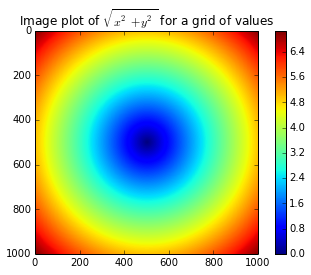

In [81]:
plt.imshow(z)
plt.colorbar()
plt.title("Image plot of $\sqrt{x^2+y^2}$ for a grid of values")

## 将条件逻辑表述为数组运算

- numpy.where函数是三元表述式`x if condition else y`的矢量化版本

In [82]:
# 根据cond中的值选取xarr和yarr的值：当cond中的值为True时，选取xarr的值，否则选取yarr的值
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])
cond = np.array([True, False, True, True, False])
result = np.where(cond, xarr, yarr)
result

array([1.1, 2.2, 1.3, 1.4, 2.5])

In [83]:
arr = np.random.randn(4, 4)
arr

array([[ 1.5966845 ,  0.92490908, -0.87425736, -0.40253821],
       [ 0.68920234,  1.95473745, -0.96465319,  0.01309371],
       [-0.71137733, -0.34870235, -0.28429453, -0.30976807],
       [-1.42144357,  0.02489568,  0.16158146,  0.20219856]])

In [84]:
# 传递给where的数组大小可以不相等，甚至可以是标量值
np.where(arr > 0, 2, -2)

array([[ 2,  2, -2, -2],
       [ 2,  2, -2,  2],
       [-2, -2, -2, -2],
       [-2,  2,  2,  2]])

In [85]:
np.where(arr > 0, 2, arr)

array([[ 2.        ,  2.        , -0.87425736, -0.40253821],
       [ 2.        ,  2.        , -0.96465319,  2.        ],
       [-0.71137733, -0.34870235, -0.28429453, -0.30976807],
       [-1.42144357,  2.        ,  2.        ,  2.        ]])

In [86]:
# where可以表述出更复杂的逻辑
cond1 = np.array([True, False, True])
cond2 = np.array([True, False, False])
cond3 = np.array([False, False, True])
cond4 = np.array([True, True, True])
np.where(cond1 & cond2, 0, np.where(cond1, 1, np.where(cond2, 2, 3)))

array([0, 3, 1])

## 数学和统计方法

- 有些数学函数可以对整个数组或某个轴向的数据进行统计计算

In [87]:
arr = np.arange(20).reshape(5, 4)
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19]])

In [88]:
# 有些函数既可以当做数组的实例方法调用，也可以当做顶级NumPy函数使用
print arr.mean()
print np.mean(arr)
print arr.sum()
print np.sum(arr)
print arr.std()
print np.std(arr)

9.5
9.5
190
190
5.766281297335398
5.766281297335398


In [89]:
# 函数可以接受一个axis参数，计算该轴向上的统计值，最终结果是一个少一维的数组
arr.mean(axis=1)

array([ 1.5,  5.5,  9.5, 13.5, 17.5])

In [90]:
arr.sum(axis=0)

array([40, 45, 50, 55])

In [91]:
# 累加函数
arr.cumsum(axis=1)

array([[ 0,  1,  3,  6],
       [ 4,  9, 15, 22],
       [ 8, 17, 27, 38],
       [12, 25, 39, 54],
       [16, 33, 51, 70]])

In [92]:
# 累乘函数
arr.cumprod(axis=0)

array([[    0,     1,     2,     3],
       [    0,     5,    12,    21],
       [    0,    45,   120,   231],
       [    0,   585,  1680,  3465],
       [    0,  9945, 30240, 65835]])

## 用于布尔型数组的方法

- any用于测试数组中是否存在True，all则检查数组中所有值是否都是True

In [93]:
bools = np.array([False, False, True, True])

In [94]:
bools.any()

True

In [95]:
bools.all()

False

## 排序

- NumPy数组可以通过sort方法就地排序，而np.sort则返回一个新数组

In [96]:
arr = np.random.randn(8)
arr

array([-0.69981649,  0.3283142 ,  1.57977109, -0.08970333, -0.51506699,
        1.49577935,  0.21607887, -0.15385102])

In [97]:
arr.sort()
arr

array([-0.69981649, -0.51506699, -0.15385102, -0.08970333,  0.21607887,
        0.3283142 ,  1.49577935,  1.57977109])

In [98]:
arr = np.random.randn(8)
arr

array([ 0.3009531 ,  0.71081421, -0.05296576,  0.93362519, -1.00681069,
       -1.22167654, -0.01469175, -0.12483407])

In [99]:
np.sort(arr)

array([-1.22167654, -1.00681069, -0.12483407, -0.05296576, -0.01469175,
        0.3009531 ,  0.71081421,  0.93362519])

In [100]:
arr = np.random.randn(5, 3)
arr

array([[-0.81408387, -1.36861713,  0.92231487],
       [-1.79410387, -0.01704977, -1.8620398 ],
       [ 0.68702505, -1.48680471,  0.77508918],
       [ 0.71641136,  1.50684296,  0.29048452],
       [ 1.83553129,  0.54280543,  0.02454534]])

In [101]:
# 可以选择对某一个轴向进行排序
arr.sort(axis=1)
arr

array([[-1.36861713, -0.81408387,  0.92231487],
       [-1.8620398 , -1.79410387, -0.01704977],
       [-1.48680471,  0.68702505,  0.77508918],
       [ 0.29048452,  0.71641136,  1.50684296],
       [ 0.02454534,  0.54280543,  1.83553129]])

## 唯一化以及其他的集合逻辑

In [102]:
# 返回数组中的唯一成员，并返回有序结果
ints = np.array([3, 3, 2, 2, 1, 4, 4, 4])
np.unique(ints)

array([1, 2, 3, 4])

In [103]:
# 测试一个数组中的值在另一个数组中的成员资格
values = np.array([6, 0, 0, 3, 2, 5, 6])
np.in1d(values, [2, 3, 6])

array([ True, False, False,  True,  True, False,  True])

## 用于数组的文件输入输出

- np.save和np.load是读写磁盘数组数据的两个主要函数，默认情况下，数组是以未压缩的原始二进制格式保存在扩展名为.npy的文件中的

In [104]:
arr = np.arange(10)
np.save('some_array', arr) # 如果文件路径末尾没有扩展名.npy，则该扩展名会被自动加上
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [105]:
np.load('some_array.npy')

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

- 通过np.savez可以将多个数组保存到一个压缩文件中，将数组以关键字参数的形式传入即可

In [106]:
np.savez('array_archive', a=arr, b=arr) # 如果文件路径末尾没有扩展名.npz，则该扩展名会被自动加上

In [107]:
arch = np.load('array_archive.npz')
print arch['a']
print arch['b']

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


## 存取文本文件

In [108]:
arr = np.arange(24).reshape(4, 6)
np.savetxt("arr.txt", arr)

In [109]:
np.loadtxt("arr.txt")

array([[ 0.,  1.,  2.,  3.,  4.,  5.],
       [ 6.,  7.,  8.,  9., 10., 11.],
       [12., 13., 14., 15., 16., 17.],
       [18., 19., 20., 21., 22., 23.]])

## 线性代数

In [110]:
x = np.array([[1, 2, 3], [4, 5, 6]])
x

array([[1, 2, 3],
       [4, 5, 6]])

In [111]:
y = np.array([[6, 23], [-1, 7], [8, 9]])
y

array([[ 6, 23],
       [-1,  7],
       [ 8,  9]])

In [112]:
# 矩阵乘法
np.dot(x, y)

array([[ 28,  64],
       [ 67, 181]])

In [113]:
# 矩阵乘法的另一种形式
y.dot(x)

array([[ 98, 127, 156],
       [ 27,  33,  39],
       [ 44,  61,  78]])

- np.linalg中有一组标准的矩阵分解运算以及诸如求逆和行列式之类的东西

In [114]:
arr = np.array([[1, 2], [2, 1]])
arr

array([[1, 2],
       [2, 1]])

In [115]:
np.linalg.inv(arr)

array([[-0.33333333,  0.66666667],
       [ 0.66666667, -0.33333333]])

In [116]:
# 解线性方程组Ax = b，其中A为一个方阵
a = np.array([[2, 1], [1, 1]])
b = np.array([3, 2])
np.linalg.solve(a, b)

array([1., 1.])

## 随机数生成

- numpy.random模块对Python内置的random进行了补充，增加了一些用于高效生成多种概率分布的样本值的函数

In [117]:
# 标准正态分布
np.random.normal(size=(4, 4))

array([[-1.75931094,  1.71704482,  1.15052538,  0.29525197],
       [ 0.31518012, -0.67913573,  0.60912763,  1.10262178],
       [ 0.77733843,  0.72580841,  0.47770899, -0.48042282],
       [ 0.28541903, -3.27262702,  0.67189078, -1.33347733]])

In [118]:
np.random.randint(0, 2, size=10)

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1])